# Practice

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("subject_1.csv")
df

time  ppg_signal  subject_id
0      0.000000   -0.005162           1
1      0.010002    0.115503           1
2      0.020003    0.239821           1
3      0.030005    0.339529           1
4      0.040007    0.472772           1
...         ...         ...         ...
5995  59.959993   -0.002160           1
5996  59.969995   -0.001314           1
5997  59.979997    0.000871           1
5998  59.989998   -0.014353           1
5999  60.000000   -0.029382           1

[6000 rows x 3 columns]

In [7]:
df.isnull().sum()

time          0
ppg_signal    0
subject_id    0
dtype: int64

Text(0, 0.5, 'PPG_Signal')

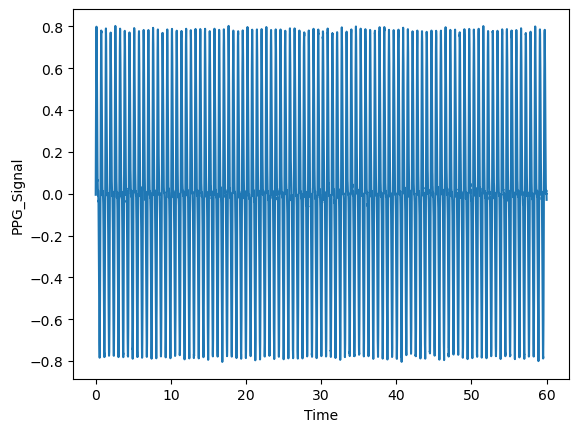

In [9]:
plt.plot(df["time"],df["ppg_signal"])
plt.xlabel("Time")
plt.ylabel("PPG_Signal")

Unsing plotly library

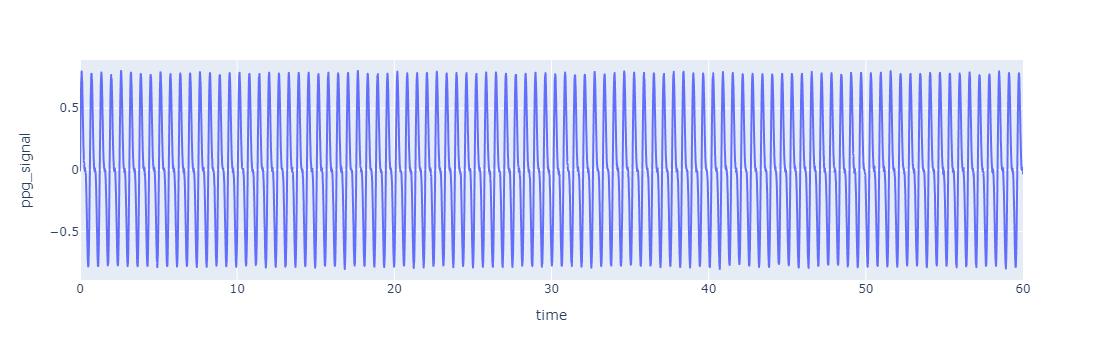

In [11]:
import plotly.express as px
df=pd.read_csv("subject_1.csv")
fig=px.line(df,x="time",y="ppg_signal")
fig.show()

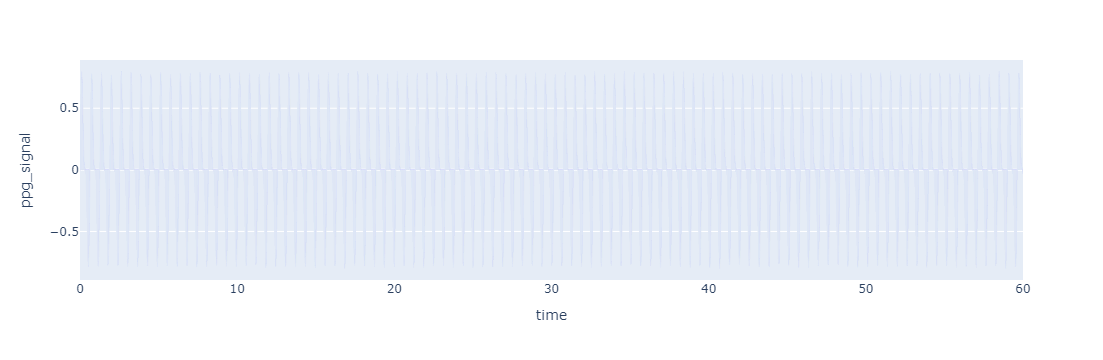

In [13]:
fig=px.bar(df,x="time",y="ppg_signal")
fig.show()

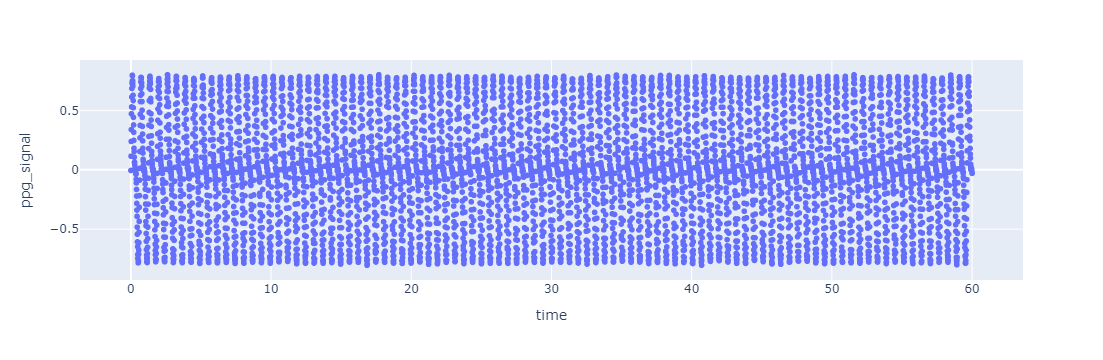

In [15]:
fig=px.scatter(df,x="time",y="ppg_signal")
fig.show()

# Linear Regression Model

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
df= pd.read_csv("student_dataset.csv")
df

Student_ID  Age  Gender  Hours_Studied  Attendance_Rate  \
0            1   24  Female            3.6             55.1   
1            2   21  Female            6.2             83.2   
2            3   22    Male            2.2             50.3   
3            4   24  Female            1.1             58.0   
4            5   20    Male            2.7             77.4   
..         ...  ...     ...            ...              ...   
95          96   23  Female            1.1             76.6   
96          97   21  Female            1.7             77.0   
97          98   23    Male            7.2             81.9   
98          99   24    Male            5.0             86.3   
99         100   24    Male            0.6             98.8   

    Previous_Sem_CGPA  Family_Income Part_Time_Job  Final_Score  
0                7.58          67280           Yes         94.2  
1                6.61          99459            No         88.5  
2                8.98          36779            No         96.7  
3                6.35          83932            No         82.2  
4                7.19          92936            No         74.9  
..                ...            ...           ...          ...  
95               9.51         113714           Yes         53.1  
96               7.53         114246            No         46.5  
97               9.13          35485            No         40.8  
98               6.60          64482           Yes         42.8  
99               9.48         106188           Yes         65.0  

[100 rows x 9 columns]

In [21]:
df.describe()

Student_ID         Age  Hours_Studied  Attendance_Rate  \
count  100.000000  100.000000     100.000000        100.00000   
mean    50.500000   21.210000       4.214000         76.41500   
std     29.011492    1.913773       2.224293         14.43588   
min      1.000000   18.000000       0.600000         50.30000   
25%     25.750000   19.750000       2.300000         64.60000   
50%     50.500000   21.000000       4.300000         78.10000   
75%     75.250000   23.000000       6.225000         87.60000   
max    100.000000   24.000000       7.900000         99.50000   

       Previous_Sem_CGPA  Family_Income  Final_Score  
count         100.000000     100.000000   100.000000  
mean            7.459900   81902.370000    67.907000  
std             1.477141   35735.329886    19.655468  
min             5.070000   21062.000000    35.900000  
25%             6.247500   48019.250000    49.625000  
50%             7.490000   81888.500000    67.000000  
75%             8.750000  109449.250000    86.350000  
max             9.950000  146174.000000   100.000000

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         100 non-null    int64  
 1   Age                100 non-null    int64  
 2   Gender             100 non-null    object 
 3   Hours_Studied      100 non-null    float64
 4   Attendance_Rate    100 non-null    float64
 5   Previous_Sem_CGPA  100 non-null    float64
 6   Family_Income      100 non-null    int64  
 7   Part_Time_Job      100 non-null    object 
 8   Final_Score        100 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 7.2+ KB


In [25]:
df.isnull().sum()

Student_ID           0
Age                  0
Gender               0
Hours_Studied        0
Attendance_Rate      0
Previous_Sem_CGPA    0
Family_Income        0
Part_Time_Job        0
Final_Score          0
dtype: int64

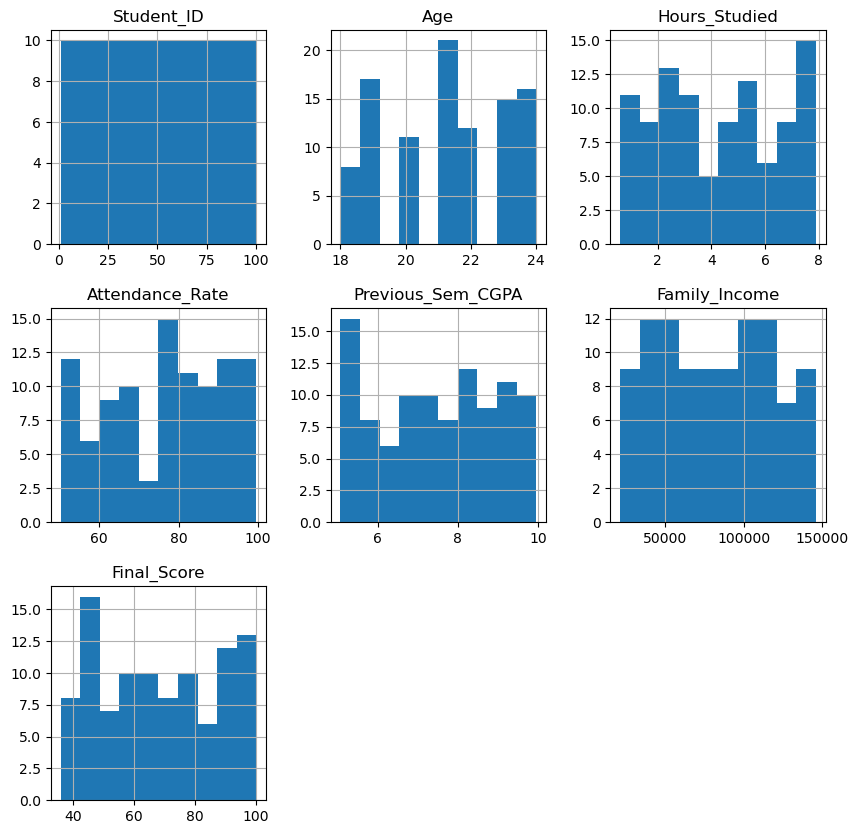

In [27]:
df.hist(figsize=(10,10))
plt.show()

In [29]:
feature_hours=df["Hours_Studied"]
target_scores=df["Final_Score"]
print(feature_hours)

0     3.6
1     6.2
2     2.2
3     1.1
4     2.7
     ... 
95    1.1
96    1.7
97    7.2
98    5.0
99    0.6
Name: Hours_Studied, Length: 100, dtype: float64


In [37]:
x_train,x_test,y_train,y_test=train_test_split(feature_hours,target_scores,test_size=0.2,random_state=42)

In [39]:
print(x_test.values)

[2.3 6.  5.7 2.3 7.3 0.8 0.6 6.6 6.5 3.6 2.2 4.4 1.5 7.8 5.9 2.7 7.4 7.1
 7.2 5.8]


In [41]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test.values.reshape(-1, 1))
print(y_pred)

[73.23175479 63.33572544 64.1381062  73.23175479 59.85874216 77.24365857
 77.77857908 61.73096393 61.99842418 69.7547715  73.49921504 67.61508948
 75.37143681 58.5214409  63.6031857  72.16191378 59.59128191 60.39366267
 60.12620241 63.87064595]


In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 410.3085306993936
R-squared: -0.10651996713785872
